# References
## Cleveland et al. (1981)
* Antidromic stimuli applied to study the static behavior of Renshaw cells. Stimulus pulses were 200 $\mu$s wide and supramaximal for $\alpha$-axons.
* Discharge rate was measured during the 5th second after stimulation began at a given frequency.
* The data presented are all averages of a number of such measurements (usually 10) in the same cell.
* The static input-output relations for different frequencies, as shown in their Figure 5A.

## Ross et al. (1982)
* Stimuli consisted of trains of electrical impulses (supramaximal for $\alpha$-axons, 200 $\mu$s wide) applied to the proximal end of cut ventral roots L7 or S1.
* Stimulation were delivered antidromically for 5 s at a given frequency and then suddenly switched to a higher or lower stimulus frequency for another 5 s.
* Step changes recruitment were produced by isolating two filaments from a ventral root, both of which alone sufficed to excite the Renshaw cell. Each part of the root was placed on stimulus electrodes which could be connected by electronic switches to the impulse train, which had a constant frequency (ranging from 5 - 50 Hz) and strength (supramaximal for $\alpha$-axons)

# Parameters adjusted

# Considerations
* A great variability is not expected here, therefore, at least for now, averages will not be carried out.
* Since 5 s is too much to simulate, the adaptation time is reduced and the plot shown is to assure the cell have adapted after the adopted value.
* Figure 5B (Cleveland et al., 1981) can also be a good direction, but I am not expecting too much variation.
* For simplicity, stimulations in Ross et al. (1982) were simulated as a antidromic in the whole pool. This is acceptable bacause of the small topographic distribution of motoneurons and, as argued by the authors, the number of axons collaterals activating the Renshaw cell is not what defines its dynamic behavior.
* In both papers, deafferentation resulted in no spontaneous responses.

In [1]:
import sys
sys.path.insert(0, '../../..')
import time

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [61]:
def static_simulator(numberS, numberFR, numberFF, numberRC, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC, frequency):

    conf = Configuration('../../confuchiyama.rmto')
    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 1000
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
    # Antidromic stimulus
    idx = np.where(conf.confArray['f0']=='stimStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='stimStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 1000
    idx = np.where(conf.confArray['f0']=='stimIntensity_PTN')[0][0]
    conf.confArray['f1'][idx] = 20
    idx = np.where(conf.confArray['f0']=='stimFrequency_PTN')[0][0]
    conf.confArray['f1'][idx] = frequency
    idx = np.where(conf.confArray['f0']=='stimPulseDuration_PTN')[0][0]
    conf.confArray['f1'][idx] = 0.2
    idx = np.where(conf.confArray['f0']=='stimModulationStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 0
    idx = np.where(conf.confArray['f0']=='stimModulationStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 0
    idx = np.where(conf.confArray['f0']=='stimModulation_PTN')[0][0]
    conf.confArray['f1'][idx] = frequency
    # Dynamics of MN-RC synapse
    idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
#     import pdb; pdb.set_trace()
    for i in xrange(pools[0].MUnumber):
        pools[0].unit[i].createStimulus()
    
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
    
    plt.figure()
    plt.plot(t, pools[0].unit[0].nerveStimulus_mA)
    plt.show()

    RC_mV = np.zeros_like(t)
    for i in xrange(0, len(t)):
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[1].v_mV[0]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
    tmin = 500
    availableRCs = range(pools[1].Nnumber)
    recordedRC = np.random.choice(availableRCs)
    RCSpikeInstants = pools[1].poolSomaSpikes[pools[1].poolSomaSpikes[:,1]==recordedRC, 0]
    numberOfSpikes = len(RCSpikeInstants[RCSpikeInstants>tmin])
    firingRate = float(numberOfSpikes)*1e3/(conf.simDuration_ms-tmin)
    
    plt.figure()
    plt.plot(t, RC_mV)
    plt.title('RC Membrane Potential')
    plt.show()
    
    return firingRate

In [64]:
nS = 1#75
nFR = 1#75
nFF = 2#150
nRC = 4#300
params = 'final'
declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37786 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built


<IPython.core.display.Javascript object>


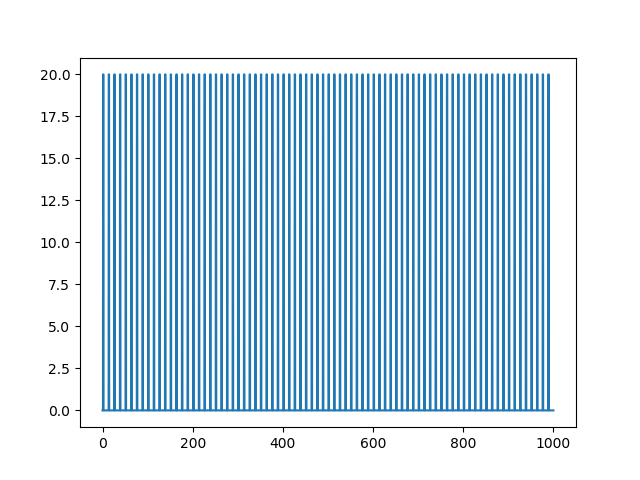

<IPython.core.display.Javascript object>


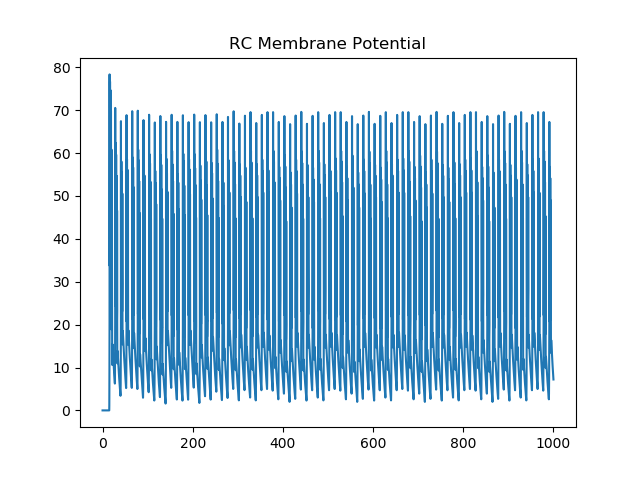

<IPython.core.display.Javascript object>


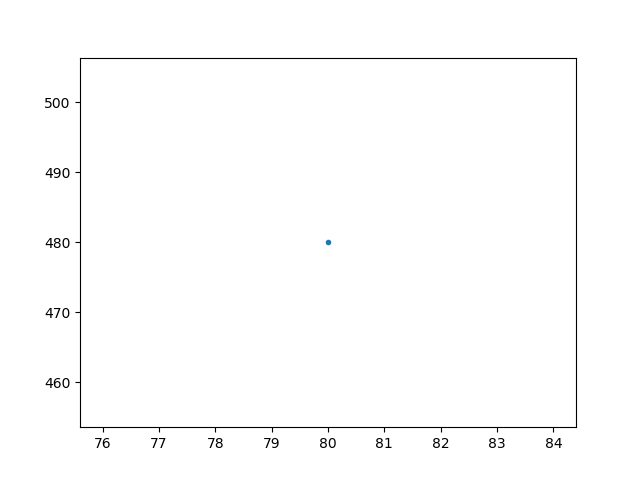

In [63]:
f = [80]#range(10, 80, 10)
FR = np.zeros((len(f)))

for i, j in enumerate(f):
    FR[i] = static_simulator(nS, nFR, nFF, nRC, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition, j)

plt.figure()
plt.plot(f, FR, '.')
plt.show()

In [81]:
def dynamic_simulator(numberS, numberFR, numberFF, numberRC, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC, frequency1, frequency2):

    conf = Configuration('../../confuchiyama.rmto')
    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 1000
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
    # Antidromic stimulus
    idx = np.where(conf.confArray['f0']=='stimStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='stimStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 1000
    idx = np.where(conf.confArray['f0']=='stimIntensity_PTN')[0][0]
    conf.confArray['f1'][idx] = 20
    idx = np.where(conf.confArray['f0']=='stimFrequency_PTN')[0][0]
    conf.confArray['f1'][idx] = frequency1
    idx = np.where(conf.confArray['f0']=='stimPulseDuration_PTN')[0][0]
    conf.confArray['f1'][idx] = 0.2
    idx = np.where(conf.confArray['f0']=='stimModulationStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 600
    idx = np.where(conf.confArray['f0']=='stimModulationStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 1000
    idx = np.where(conf.confArray['f0']=='stimModulation_PTN')[0][0]
    conf.confArray['f1'][idx] = frequency2 - frequency1
    # Dynamics of MN-RC synapse
    idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    
    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')
    
    for i in xrange(pools[0].MUnumber):
        pools[0].unit[i].createStimulus()
    
    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
    
    plt.figure()
    plt.plot(t, pools[0].unit[0].nerveStimulus_mA)
    plt.show()

    RC_mV = np.zeros_like(t)
    for i in xrange(0, len(t)):
        pools[0].atualizeMotorUnitPool(t[i]) # MN pool
        pools[1].atualizeInterneuronPool(t[i]) # RC pool
        RC_mV[i] = pools[1].v_mV[0]

    pools[0].listSpikes()
    pools[1].listSpikes()
    
    availableRCs = range(pools[1].Nnumber)
    recordedRC = np.random.choice(availableRCs)
    RCSpikeInstants = pools[1].poolSomaSpikes[pools[1].poolSomaSpikes[:,1]==recordedRC, 0]
    
    binDuration1_ms = 1/float(frequency1)*1e3
    binDuration2_ms = 1/float(frequency2)*1e3
    bins1 = range(int(600/binDuration1_ms))
    bins2 = range(len(bins1), int(400/binDuration2_ms)+len(bins1))
    spikesPerBin = [0]*(len(bins1)+len(bins2))
    
    for i in bins1:
        for j in RCSpikeInstants:
                if j >= binDuration1_ms*i and j<binDuration1_ms*(i+1):
                    spikesPerBin[i]+=1
#     import pdb; pdb.set_trace()
    stepIndex = i
    for k in bins2:
        for j in RCSpikeInstants:
                if j >= 600+binDuration2_ms*(k-len(bins1)) and j<600+binDuration2_ms*(k-len(bins1)+1):
                    spikesPerBin[k]+=1

    firingRate = [y*1e3/binDuration1_ms if x<stepIndex else y*1e3/binDuration2_ms for x,y in enumerate(spikesPerBin)]
    
    plt.figure()
    plt.plot(RCSpikeInstants, [1]*len(RCSpikeInstants), '.')
    plt.show()
    
    return firingRate

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 9 synapses were built
Synaptic Noise on RC_ext built
All the 4 synaptic noises were built


<IPython.core.display.Javascript object>


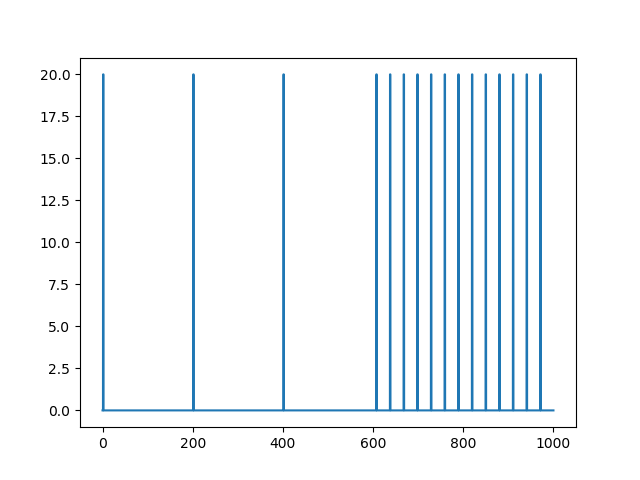

<IPython.core.display.Javascript object>


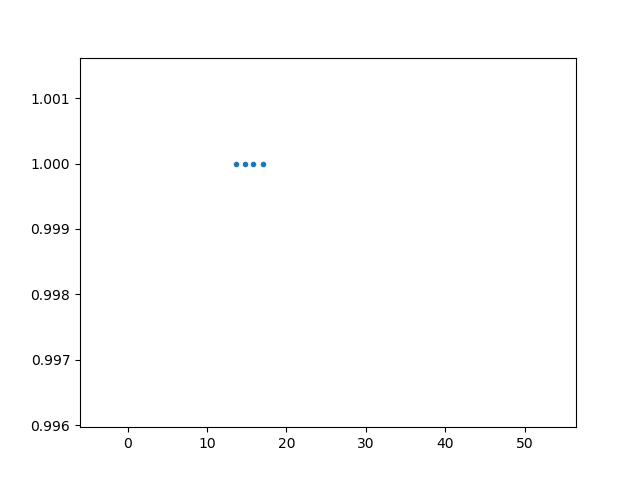

<IPython.core.display.Javascript object>


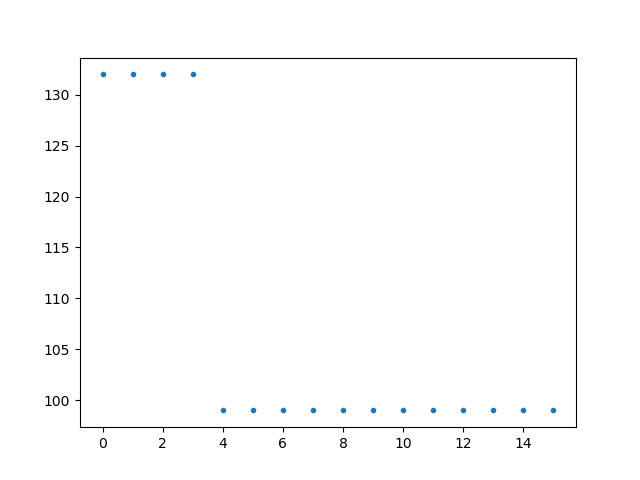

In [82]:
FR = np.zeros((len(f)))
f1 = 5
f2 = 33

FR = dynamic_simulator(nS, nFR, nFF, nRC, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition, f1, f2)

plt.figure()
plt.plot(FR, '.')
plt.show()